# Stock Modigliani Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'NFLX' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def modigliani_ratio(stocks_returns, market_returns, rf):
    days = 252
    volatility = stocks_returns.std() * np.sqrt(days) 
    sharpe_ratio = (stocks_returns.mean() - rf) / volatility 
    benchmark_volatility = market_returns.std() * np.sqrt(days)
    m2_ratio = (sharpe_ratio * benchmark_volatility) + rf
    return m2_ratio

In [7]:
modigliani_ratio(stocks_returns, market_returns, rf)

Date
2020-01-03 00:00:00-05:00    0.000253
2020-01-06 00:00:00-05:00    0.000197
2020-01-07 00:00:00-05:00    0.000253
2020-01-08 00:00:00-05:00    0.000365
2020-01-09 00:00:00-05:00    0.000309
                               ...   
2023-02-22 00:00:00-05:00    0.000421
2023-02-23 00:00:00-05:00    0.000421
2023-02-24 00:00:00-05:00    0.000309
2023-02-27 00:00:00-05:00    0.000309
2023-02-28 00:00:00-05:00    0.000309
Name: Adj Close, Length: 794, dtype: float64

In [8]:
m2 = modigliani_ratio(stocks_returns, market_returns, rf)

Text(0, 0.5, 'Modigliani Ratio')

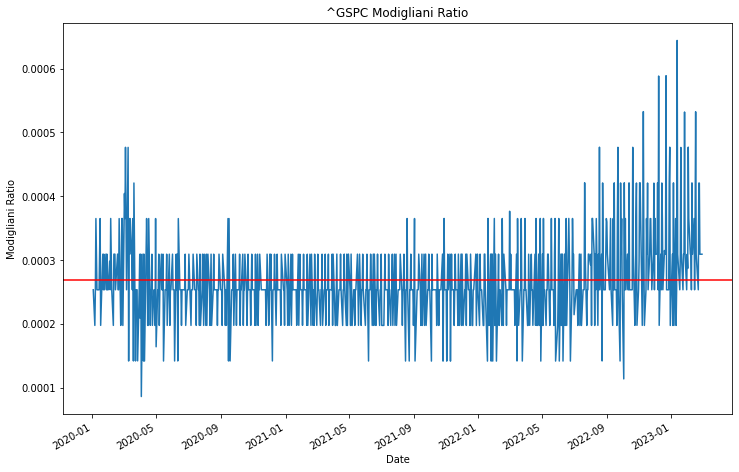

In [9]:
m2.plot(figsize=(12,8), title = symbol1 + ' Modigliani Ratio')
plt.axhline(y=m2.mean(), color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Modigliani Ratio')